In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MultiLabelBinarizer

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# For multiclass classification
from sklearn.multiclass import OneVsRestClassifier

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Đọc dữ liệu

In [22]:
train_df = pd.read_csv('train_data.csv')
train_df

,text,label
0,<number> công_cụ ai giúp tăng_tốc_độ học của b...,['#sharing']
1,hi_mng hiện_tại đang <number> tuổi và vì đam_m...,['#Q&A']
2,chào cả nhà đang muốn nhúng code python vào ca...,"['#Q&A', '#python', '#cv']"
3,em chào mọi người em đang muốn làm về building...,"['#machine_learning', '#Q&A', '#python']"
4,em chào anh việt chào các bạn trong group hiện...,"['#nlp', '#Q&A', '#deep_learning', '#cv']"
...,...,...
1043,dạ em chào mấy anh_chị em mới bắt_đầu học về m...,"['#Q&A', '#math', '#machine_learning']"
1044,bayesian optimization là một thuật_toán tối_ưu...,"['#sharing', '#math']"
1045,em hoàn_thành xong khoá ml của thầy andrew rồi...,"['#Q&A', '#math', '#machine_learning']"
1046,chào anh_chị em có giá_trị mean <number> stand...,"['#Q&A', '#math']"


In [23]:
test_df = pd.read_csv('test_data.csv')
test_df

,text,label
0,em chào mọi người em đang làm tập_tành làm bài...,"['#nlp', '#Q&A']"
1,những sự ra_mắt của ai đáng nhớ nhất trong năm...,['#sharing']
2,mọi người ai có dữ_liệu ảnh tiền polymer vn để...,"['#machine_learning', '#data', '#Q&A', '#cv']"
3,cheat sheet <number> trang dành cho python hi ...,"['#python', '#sharing']"
4,dạ em muốn làm <number> model face recognite n...,"['#data', '#Q&A', '#deep_learning', '#cv']"
...,...,...
229,mn cho em hỏi tại sau ma_trận hiệp phương_sai ...,"['#Q&A', '#math']"
230,hi_mng mình đạng học về môn statistic cơ_bản v...,"['#Q&A', '#math']"
231,chào anh chị cho em hỏi về arima model một xíu...,"['#Q&A', '#math']"
232,chào mọi người em là học_sinh lớp <number> muố...,"['#Q&A', '#math', '#machine_learning']"


# Xử lí Label

In [24]:
train_labels = []
for idx,label in enumerate(train_df["label"]):
  train_labels.append(label)
train_hashtags_list = [eval(hashtag) for hashtag in train_labels]
train_hashtags_list

[['#sharing'],
 ['#Q&A'],
 ['#Q&A', '#python', '#cv'],
 ['#machine_learning', '#Q&A', '#python'],
 ['#nlp', '#Q&A', '#deep_learning', '#cv'],
 ['#python', '#sharing'],
 ['#python', '#deep_learning', '#sharing'],
 ['#sharing'],
 ['#data', '#Q&A', '#deep_learning'],
 ['#nlp', '#Q&A', '#deep_learning', '#cv'],
 ['#Q&A'],
 ['#math', '#Q&A', '#cv'],
 ['#Q&A', '#deep_learning', '#cv'],
 ['#Q&A', '#deep_learning', '#cv'],
 ['#python', '#sharing'],
 ['#sharing'],
 ['#sharing'],
 ['#machine_learning', '#sharing'],
 ['#python', '#sharing'],
 ['#Q&A'],
 ['#machine_learning', '#Q&A', '#math'],
 ['#nlp', '#Q&A', '#cv'],
 ['#math', '#sharing'],
 ['#Q&A', '#deep_learning', '#cv'],
 ['#data', '#sharing'],
 ['#python', '#sharing'],
 ['#python', '#sharing'],
 ['#data', '#sharing'],
 ['#machine_learning', '#Q&A', '#deep_learning', '#math'],
 ['#sharing'],
 ['#sharing'],
 ['#Q&A'],
 ['#Q&A', '#python'],
 ['#sharing'],
 ['#Q&A'],
 ['#Q&A', '#python', '#cv'],
 ['#python', '#sharing'],
 ['#Q&A', '#cv'],
 ['#

In [25]:
test_labels = []
for idx,label in enumerate(test_df["label"]):
  test_labels.append(label)
test_hashtags_list = [eval(hashtag) for hashtag in test_labels]
test_hashtags_list

[['#nlp', '#Q&A'],
 ['#sharing'],
 ['#machine_learning', '#data', '#Q&A', '#cv'],
 ['#python', '#sharing'],
 ['#data', '#Q&A', '#deep_learning', '#cv'],
 ['#deep_learning', '#sharing'],
 ['#machine_learning', '#Q&A'],
 ['#sharing', '#machine_learning'],
 ['#sharing', '#cv'],
 ['#Q&A', '#data'],
 ['#sharing', '#python'],
 ['#sharing', '#python'],
 ['#sharing'],
 ['#Q&A', '#nlp'],
 ['#sharing', '#python'],
 ['#sharing', '#data'],
 ['#Q&A', '#deep_learning', '#cv'],
 ['#Q&A', '#machine_learning'],
 ['#Q&A', '#nlp'],
 ['#sharing', '#machine_learning'],
 ['#sharing', '#python'],
 ['#Q&A', '#nlp'],
 ['#Q&A', '#machine_learning'],
 ['#sharing'],
 ['#sharing', '#machine_learning'],
 ['#sharing', '#deep_learning'],
 ['#sharing', '#python', '#data'],
 ['#Q&A', '#nlp'],
 ['#sharing'],
 ['#Q&A', '#cv'],
 ['#Q&A', '#deep_learning'],
 ['#sharing', '#machine_learning'],
 ['#Q&A', '#deep_learning'],
 ['#sharing', '#data'],
 ['#sharing', '#data', '#machine_learning'],
 ['#Q&A', '#cv', '#deep_learning']

In [26]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_hashtags_list)
print("Classes:", mlb.classes_)
print("Encoded Labels:")
print(y_train)

Classes: ['#Q&A' '#cv' '#data' '#deep_learning' '#machine_learning' '#math' '#nlp'
 '#python' '#sharing']
Encoded Labels:
[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [27]:
mlb = MultiLabelBinarizer()
y_test = mlb.fit_transform(test_hashtags_list)
print("Classes:", mlb.classes_)
print("Encoded Labels:")
print(y_test)

Classes: ['#Q&A' '#cv' '#data' '#deep_learning' '#machine_learning' '#math' '#nlp'
 '#python' '#sharing']
Encoded Labels:
[[1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [28]:
x_train = list(train_df['text'])

In [29]:
x_test = list(test_df['text'])

# Định nghĩa Model

In [30]:
class Model:
    def __init__(self, max_iter, vectorizer, model_name):
        # Sử dụng phương pháp trích xuất đặc trưng "Bag of word" và "TFIDF" (mỗi giá trị vector là tần số xuất hiên của từ trong text)
        if vectorizer == 'BOW':
            self.vectorizer = CountVectorizer()
        elif vectorizer == 'TFIDF':
            self.vectorizer = TfidfVectorizer()
        if model_name == 'logistic':
            model1 = LogisticRegression(penalty='l2',C=10,  fit_intercept=True, solver='lbfgs',
                                                     max_iter=max_iter, multi_class='multinomial', n_jobs=-1)
        elif model_name == 'naivebayes':
            model1 = MultinomialNB(alpha=1.0)
        elif model_name == 'svm':
            model1 = LinearSVC(C=10, penalty='l2', dual=False, loss='squared_hinge')

        self.model = OneVsRestClassifier(model1)
    def fit(self, X, Y):
        # Chuyển hóa text thành 1 vector
        X_vectorized = self.vectorizer.fit_transform(X)
        self.model.fit(X_vectorized, Y)

    def predict(self, X):
        X_vectorized = self.vectorizer.transform(X)
        predict = self.model.predict(X_vectorized)
        return predict
    def predict_label(self, X):
        array = self.predict(X)
        selected_classes_indices = np.where(array == 1)[1]
        selected_classes = [mlb.classes_[index] for index in selected_classes_indices]
        print(selected_classes)
    def evaluation(self, X,y):
        y_pred = self.predict(X)
        temp = 0
        for i in range(y.shape[0]):
            temp += sum(np.logical_and(y[i], y_pred[i])) / sum(np.logical_or(y[i], y_pred[i]))
        return temp / y.shape[0]


# LOGISTIC REGRESSION, SVM, NAIVE BAYES

In [31]:
accurancies_tfidf = []
accurancies_bow = []
models = ['logistic', 'svm', 'naivebayes']
for item in models:
  print("-----------------")
  print(item)
  print("-----------------")
  print("TF-IDF")
  model_tfidf = Model(1000, 'TFIDF', item)
  model_tfidf.fit(x_train, y_train)
  print("Accurancy = ",model_tfidf.evaluation(x_test,y_test))
  print("BOW")
  model_bow = Model(1000, 'BOW', item)
  model_bow.fit(x_train, y_train)
  print("Accurancy = ",model_bow.evaluation(x_test,y_test))
  accurancies_tfidf.append(model_tfidf.evaluation(x_test,y_test))
  accurancies_bow.append(model_bow.evaluation(x_test,y_test))

-----------------
logistic
-----------------
TF-IDF


Accurancy =  0.6445868945868946
BOW
Accurancy =  0.6509259259259258
-----------------
svm
-----------------
TF-IDF
Accurancy =  0.6787749287749292
BOW


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed t

Accurancy =  0.6418091168091168
-----------------
naivebayes
-----------------
TF-IDF
Accurancy =  0.4095441595441594
BOW
Accurancy =  0.5589031339031334


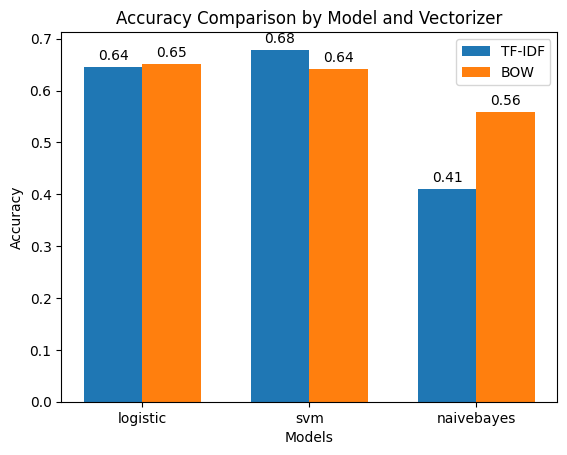

In [32]:
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, accurancies_tfidf, bar_width, label='TF-IDF')
bar2 = ax.bar(index + bar_width, accurancies_bow, bar_width, label='BOW')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison by Model and Vectorizer')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
plt.show()

# SVM MODEL with TFIDF

In [33]:
model = Model(1000, 'TFIDF', 'svm')
model.fit(x_train, y_train)

In [34]:
model.predict_label(['chào mọi người em là học_sinh lớp <number> muốn học về machine learning nhưng bị thiếu kiến_thức toán thì em phải bổ_sung đâu em đọc sách machine learning cơ_bản nhưng bị thiếu kiến_thức toán nên em thấy khó hiểu quá em phải bổ_sung những kiến_thức toán gì em cảm_ơn'])

['#Q&A', '#machine_learning', '#math']
